In [36]:
# data is size of [samples,features] and labels is size of [samples,]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd
import Linear_regresion

In [4]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


C:\Users\Kavindu\AppData\Local\Temp\ipykernel_26780\1862131621.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_features.values, labels=features, vert=True, patch_artist=True,


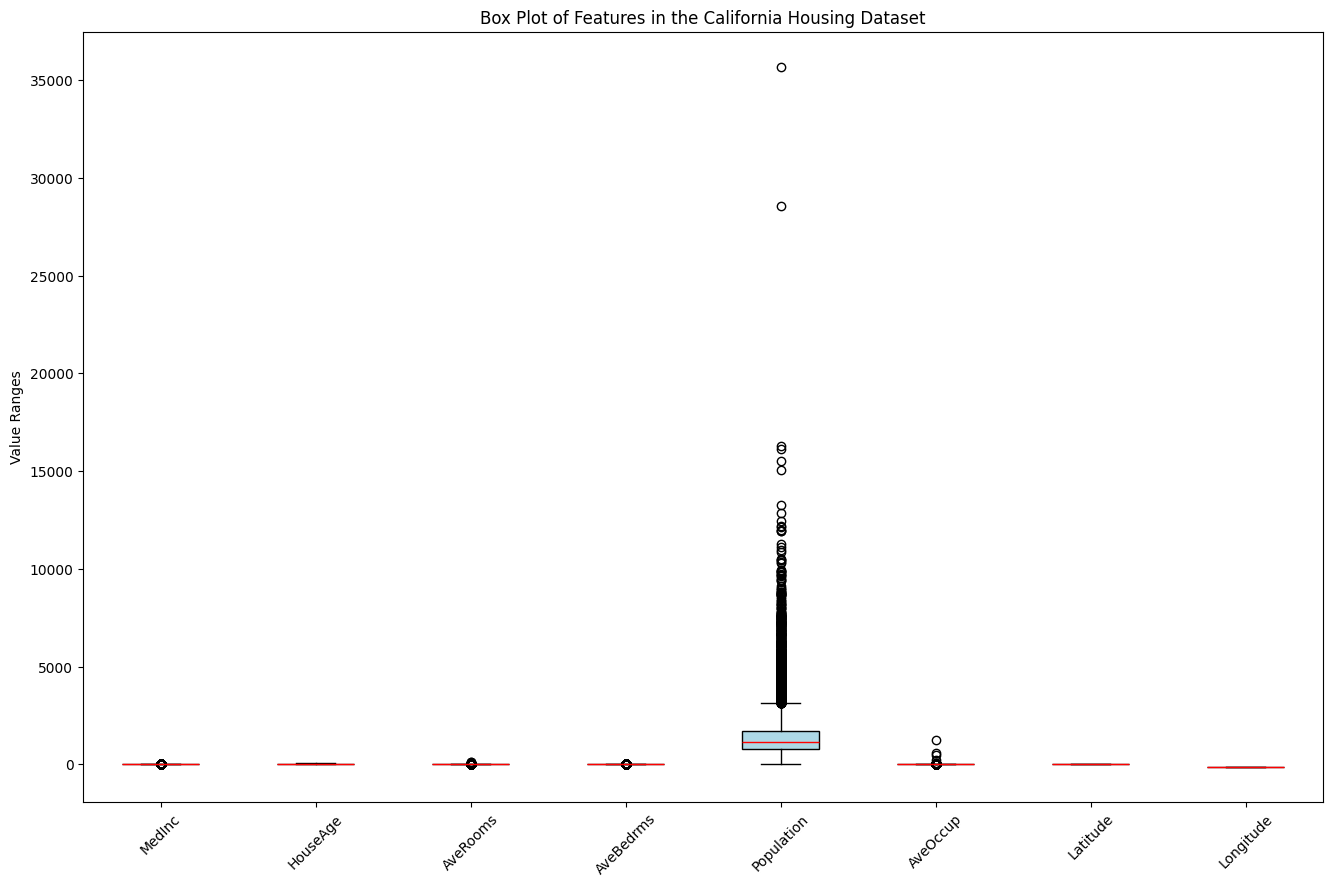

In [11]:
plt.figure(figsize=(16, 10))  
features = df.columns[:-1]  
df_features = df[features]


plt.boxplot(df_features.values, labels=features, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.xticks(rotation=45)  
plt.title('Box Plot of Features in the California Housing Dataset')
plt.ylabel('Value Ranges')
plt.show()

C:\Users\Kavindu\AppData\Local\Temp\ipykernel_26780\718154074.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_features.values, labels=features, vert=True, patch_artist=True,


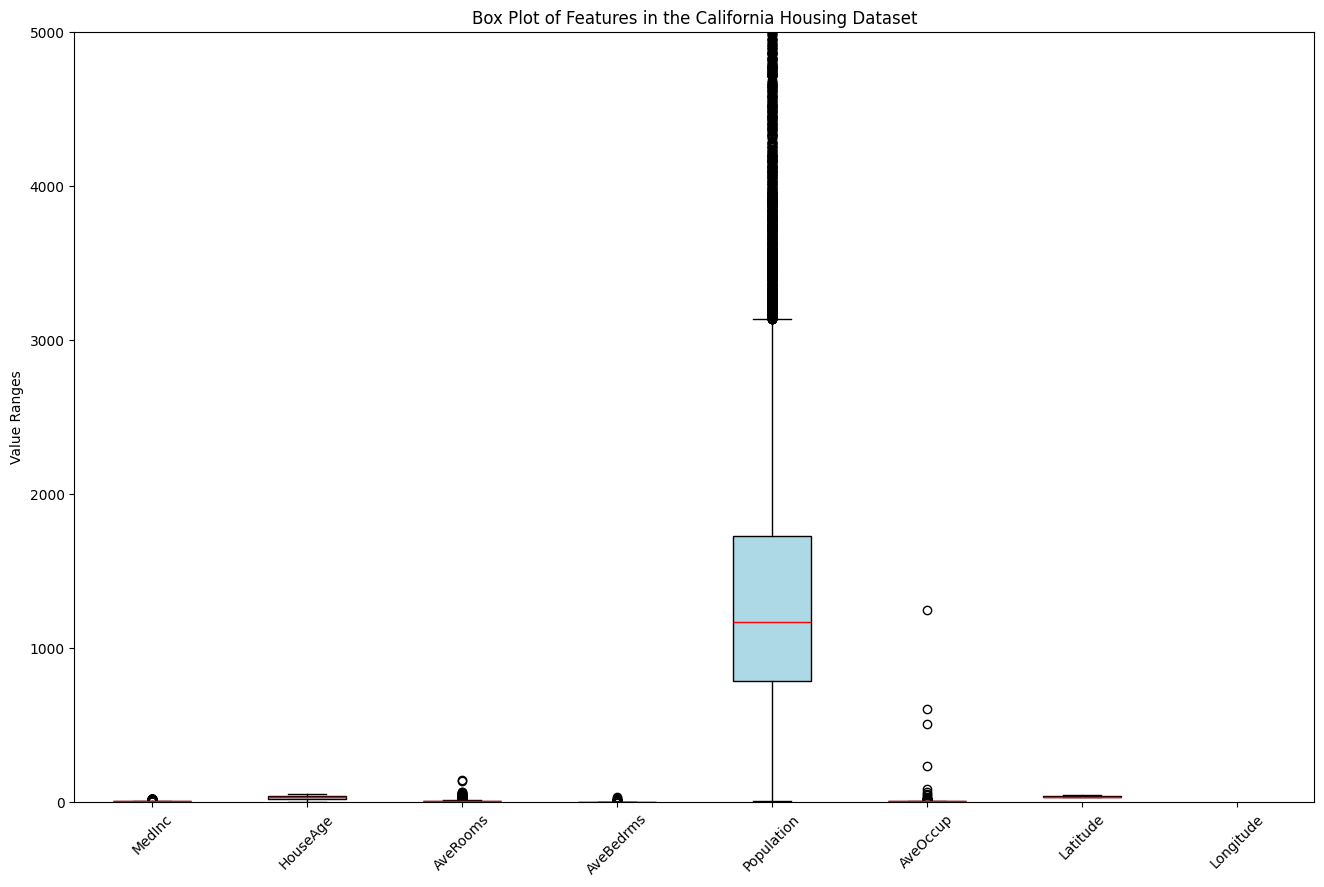

In [13]:
plt.figure(figsize=(16, 10))  
features = df.columns[:-1]  
df_features = df[features]


plt.boxplot(df_features.values, labels=features, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.xticks(rotation=45)  
plt.title('Box Plot of Features in the California Housing Dataset')
plt.ylabel('Value Ranges')
plt.ylim(0, 5000)
plt.show()

<Axes: >

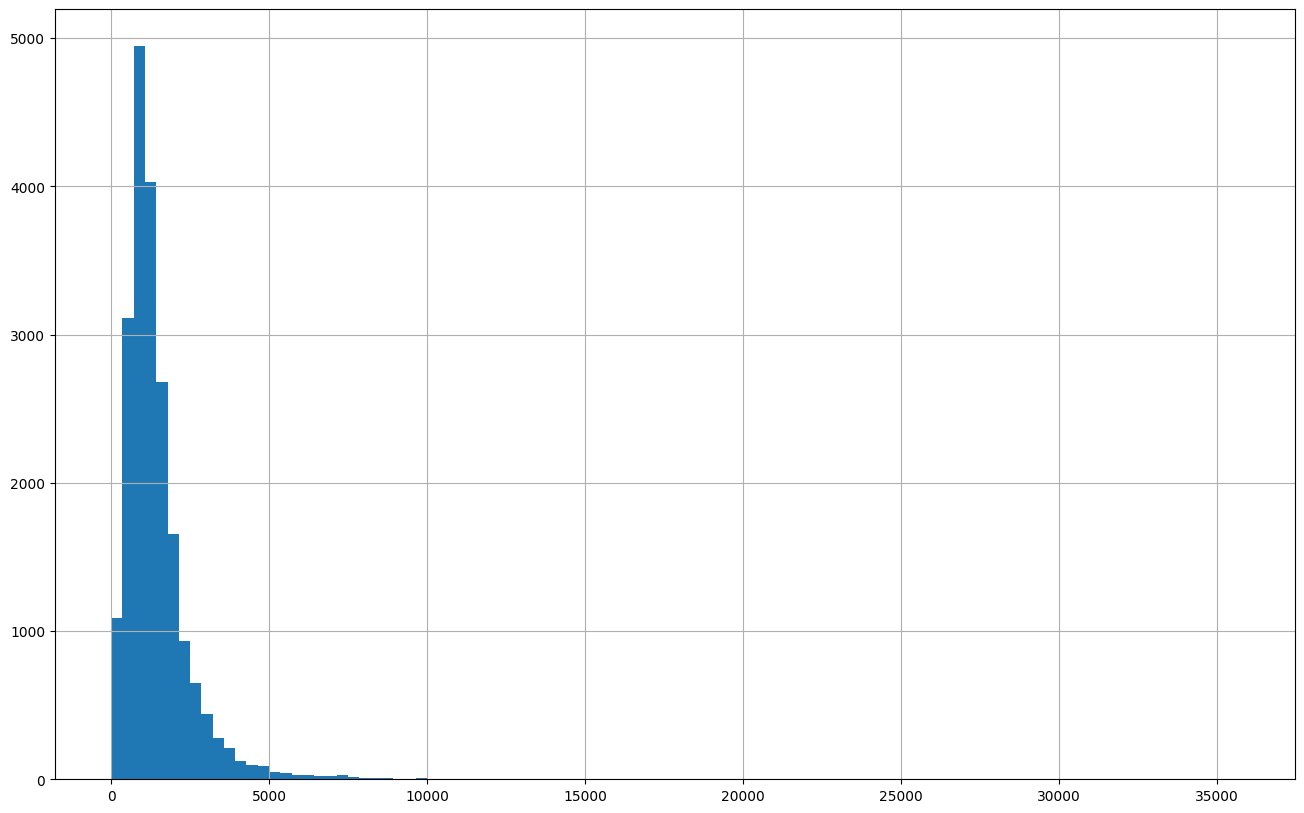

In [18]:
df['Population'].hist(bins=100, figsize=(16, 10))

In [19]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

features = df.columns[:-1]  
df_cleaned = remove_outliers_iqr(df, features)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
df_cleaned.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000
mean,3.711118,29.665735,5.165993,1.047427,1271.323143,2.846678,35.654022,-119.626791,2.022104
std,1.478956,12.254293,1.047209,0.065861,631.894783,0.631920,2.131764,1.993803,1.070322
min,0.536000,1.000000,2.133929,0.869822,5.000000,1.161290,32.540000,-124.350000,0.149990
25%,2.583300,19.000000,4.431250,1.003155,811.000000,2.416357,33.940000,-121.830000,1.206000
50%,3.533300,30.000000,5.148936,1.044118,1157.000000,2.797251,34.280000,-118.560000,1.813000
75%,4.650000,38.000000,5.865306,1.088825,1633.000000,3.230903,37.730000,-118.040000,2.594000
max,8.011300,52.000000,8.275862,1.232975,3183.000000,4.571046,41.950000,-114.570000,5.000010


In [24]:
data_numpy = df_cleaned.to_numpy()
data = data_numpy[:, :-1]
labels = data_numpy[:, -1]

In [25]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [26]:
np.shape(train_labels)

(13450,)

In [27]:
type(train_labels)

numpy.ndarray

In [38]:
dir(Linear_regresion)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [37]:
model = Linear_regresion.MutivariantLinearRegression()

AttributeError: module 'Linear_regresion' has no attribute 'MutivariantLinearRegression'